In [1]:
# Drive the neuron using an OU process.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model:
    THETA = 0.8
    MU = 1.5
    SIGMA = 0.15



In [ ]:
def mu(y: float, _t: float) -> float:
    # Ornstein-Uhlenbeck mu
    return Model.THETA * (Model.MU - y)

def sigma(_y: float, _t: float) -> float:
    # Ornstein-Uhlenbeck sigma
    return Model.SIGMA

def dW(delta_t: float) -> float:
    # sample an independent random number from a normal distribution N(0, dt) at each call
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

def run_simulation():
    T_INIT = 3
    T_END = 10
    N = 1000
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT                                      # initial condition of OU process
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT                       # current time
        y = ys[i - 1]                                   # previous value of OU process
        ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT) # OU process definition
    
    return TS, ys

def plot_simulations(num_sims: int):
    # plot several simulations in 1 image
    for _ in range(num_sims):
        plt.plot(*run_simulation())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()


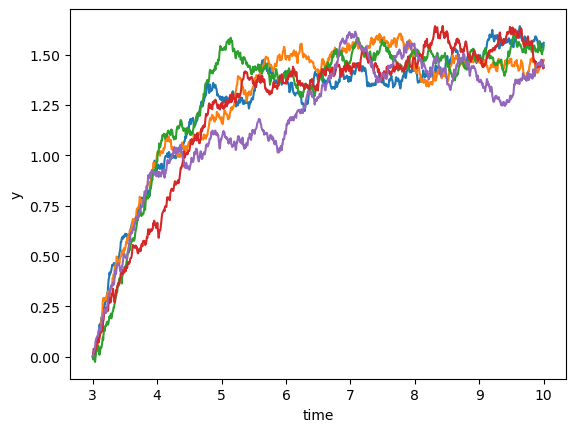

In [4]:
NUM_SIMS = 5
plot_simulations(NUM_SIMS)